<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Car_Sales_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Predict the total dollar amount the customers are willing to pay for cars with specific features

## Data Attributes

* Customer Name

* Customer Email

* Country

* Gender

* Age

* Annual Salary

* Credit Card Debt

* Net worth

#### Label

* Car Purchase Amount


## Regression Intution 

Predict value of dependent varibale (Y) base on the values of Independent variable (X)

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Training Data

In [3]:
from google.colab import files
files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data.csv


{'Car_Purchasing_Data.csv': b'Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount\r\nMartina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.8517198,62812.09301,11609.38091,238961.2505,35321.45877\r\nHarlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062335,66646.89292,9572.957136,530973.9078,45115.52566\r\nNaomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15289747,53798.55112,11160.35506,638467.1773,42925.70921\r\nJade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27136945,79370.03798,14426.16485,548599.0524,67422.36313\r\nCedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31374945,59729.1513,5358.712177,560304.0671,55915.46248\r\nCarla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489312,68499.85162,14179.47244,428485.3604,56611.99784\r\nGriffin Rivera,vehicula@at.co.uk,Syria,1,46.60731485,39814.522,5958.460188,326373.1812,28925.70549\r\nOrli Casey

In [0]:
car_df = pd.read_csv('Car_Purchasing_Data.csv',encoding='ISO8859-1')

## Display Data

In [6]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Visualize Dataset

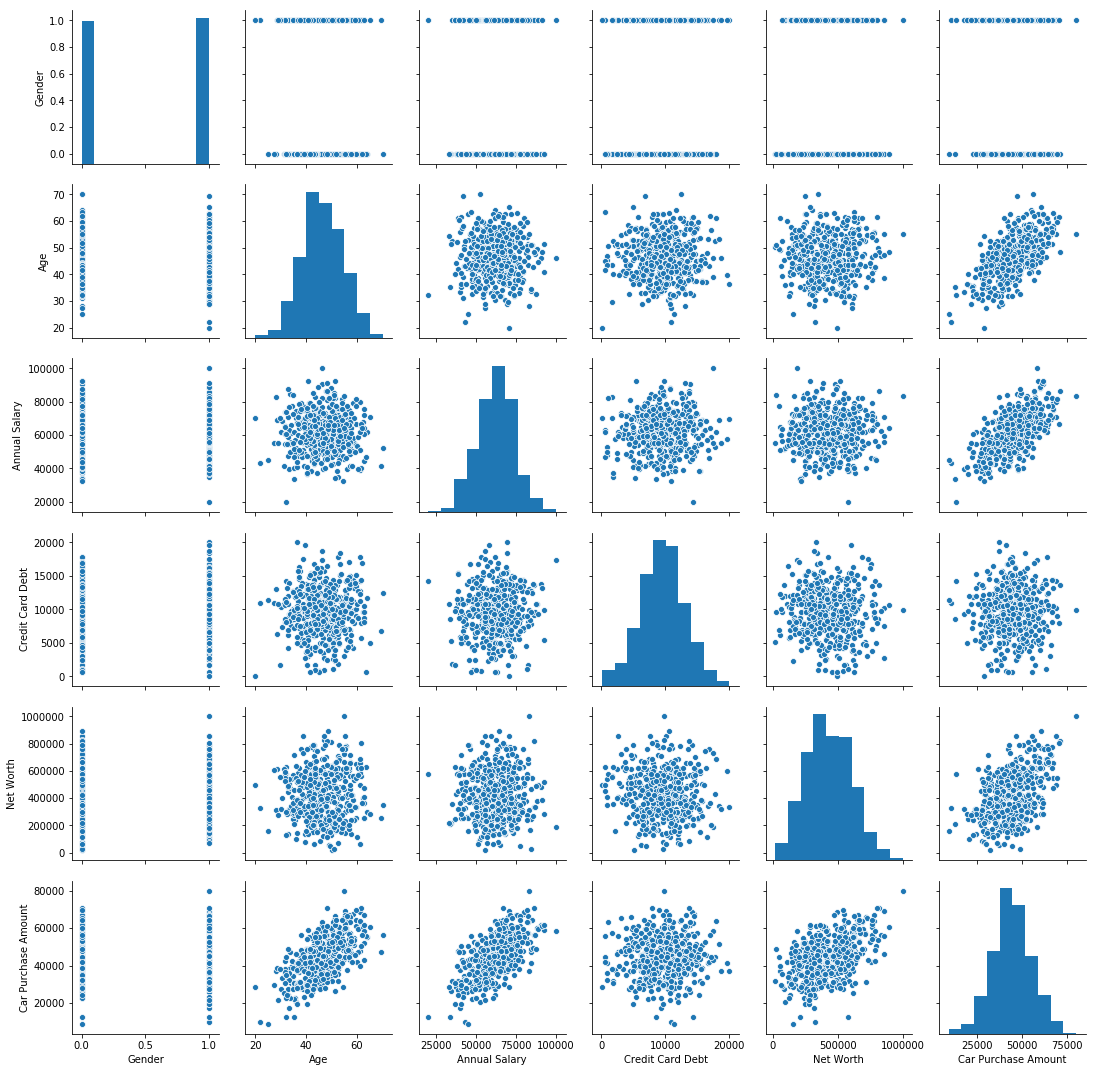

In [7]:
sns.pairplot(car_df)

## Create Training And Test Data

In [9]:
X = car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)
Y = car_df['Car Purchase Amount']
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [10]:
X.shape

(500, 5)

In [11]:
Y.shape

(500,)

## Normalize the Training Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled.shape

(500, 5)

In [14]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [15]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [0]:
Y_Scaled = scaler.fit_transform(Y.values.reshape(-1,1))

In [17]:
Y_Scaled.shape

(500, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,Y_Scaled,test_size=0.15,random_state=1)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(425, 5)
(425, 1)
(75, 5)
(75, 1)


## Build The ANN Model using Keras

In [23]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

## Train the model

In [47]:
history = model.fit(X_train,y_train,epochs=100,batch_size=25,verbose=1,validation_data=(X_test,y_test))

Train on 425 samples, validate on 75 samples
Epoch 1/100
425/425 [==============================] - 0s 1ms/step - loss: 7.7853e-05 - mean_squared_error: 7.7853e-05 - val_loss: 2.0966e-05 - val_mean_squared_error: 2.0966e-05
Epoch 2/100
425/425 [==============================] - 0s 185us/step - loss: 3.0048e-05 - mean_squared_error: 3.0048e-05 - val_loss: 1.4626e-05 - val_mean_squared_error: 1.4626e-05
Epoch 3/100
425/425 [==============================] - 0s 197us/step - loss: 8.5787e-06 - mean_squared_error: 8.5787e-06 - val_loss: 1.0592e-05 - val_mean_squared_error: 1.0592e-05
Epoch 4/100
425/425 [==============================] - 0s 217us/step - loss: 4.7965e-06 - mean_squared_error: 4.7965e-06 - val_loss: 9.0675e-06 - val_mean_squared_error: 9.0675e-06
Epoch 5/100
425/425 [==============================] - 0s 188us/step - loss: 2.9066e-06 - mean_squared_error: 2.9066e-06 - val_loss: 5.5868e-06 - val_mean_squared_error: 5.5868e-06
Epoch 6/100
425/425 [==============================]

## Visualization Training loss

In [48]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

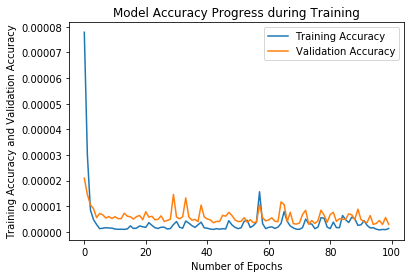

In [52]:
plt.plot(history.history['mean_squared_error'],label='Training Accuracy')
plt.plot(history.history['val_mean_squared_error'],label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy Progress during Training')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy and Validation Accuracy')
plt.show()

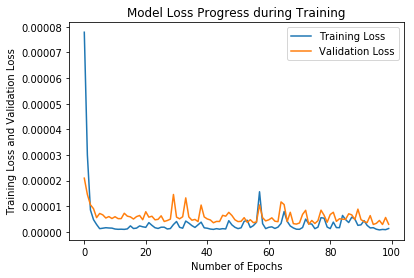

In [50]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Model Loss Progress during Training')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss and Validation Loss')
plt.show()

## Evaluate The Model

In [0]:
# Gender Age Annual Salary Credit Card Net Worth
X_test = np.array([[1,50,50000,10000,600000]])
predictions = model.predict(X_test)

In [57]:
print(f'Expected Car Purchase Amount {predictions[0][0]}$')

Expected Car Purchase Amount 254145.71875$
